<a href="https://colab.research.google.com/github/ShawnLiu119/CapstoneProject_BankingMarketing/blob/main/BankMkt_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/ShawnLiu119/CapstoneProject_BankingMarketing/main/rawdata/bank-additional-full.csv'
data = pd.read_csv(url, sep=';')

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from matplotlib import colors

**Distribution Exploration**



In [6]:
def create_hist(data, title):
    fig, axs = plt.subplots(1, 1,figsize =(10, 7), tight_layout = True)
    axs.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.6)
    axs = sns.distplot(data, hist=True).set(title=title + ' Distribution')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


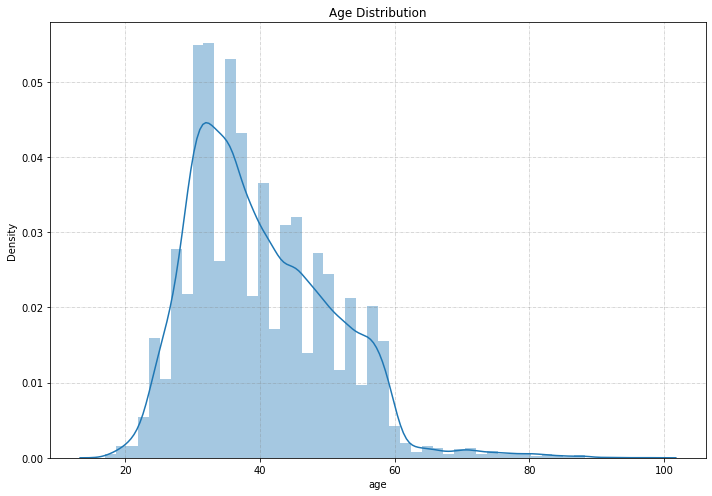

In [7]:
create_hist(data['age'], 'Age')

In [8]:
df_y = data[data['y'] == 'yes']
df_n = data[data['y'] =='no']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


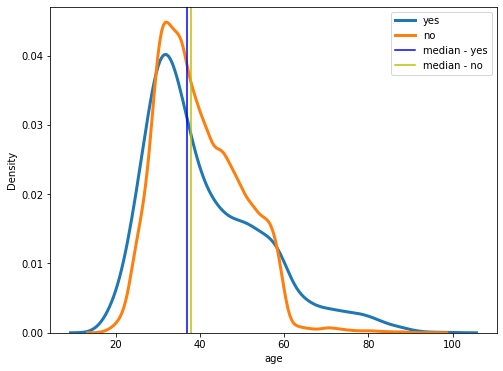

In [9]:
plt.figure(figsize=(8,6))
sns.distplot(df_y['age'], hist = False, kde = True, kde_kws = {'linewidth': 3},label = 'yes')
sns.distplot(df_n['age'], hist = False, kde = True, kde_kws = {'linewidth': 3},label = 'no')    

median_y = df_y['age'].median()
median_n = df_n['age'].median()

plt.axvline(x = median_y, color = 'b', label = 'median - yes')
plt.axvline(x = median_n, color = 'y', label = 'median - no')

plt.legend()

In [10]:
print(median_y, median_n)

37.0 38.0


some insights: the distribution of customer who subscribed or did not susbcribed the term deposit are pretty similar, interetingly the median age of subscriber is even younger than who did not by 1 year

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


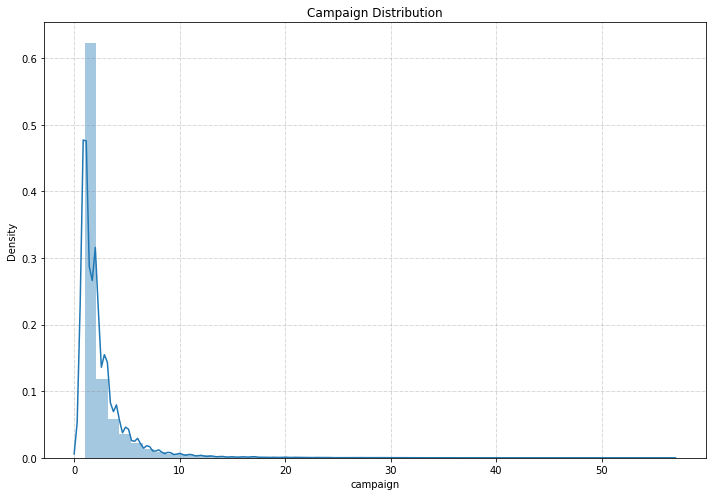

In [11]:
create_hist(data['campaign'], 'Campaign')

**Corrleation**

In [ ]:
data.corr()

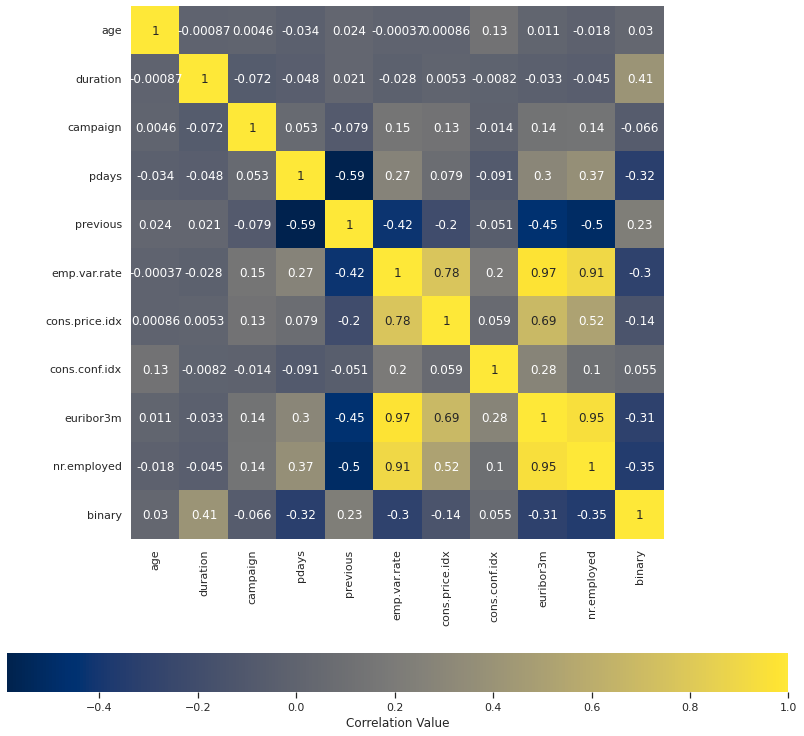

In [30]:
cor_df = data.corr()
plt.subplots(figsize = (14, 14))
sns.heatmap(cor_df,cmap = "cividis",annot = True, square = True, cbar_kws = {'label': 'Correlation Value', 'orientation': 'horizontal'});

**Conversion by different attribute**

In [31]:
data['binary'] = data['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [32]:
def conversion_bar(groupcol):
    df = pd.DataFrame(data.groupby(groupcol).apply(lambda x: x['binary'].sum()/len(x)).reset_index()).rename(columns={0:'conversion_rate'})
    fig, axs = plt.subplots(1, 1,figsize =(12, 5), tight_layout = True)
    sns.set_theme(style="whitegrid")
    ax = sns.barplot(x=groupcol, y='conversion_rate', data=df)
    ax.title.set_text('conversion rate by {}'.format(groupcol))
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


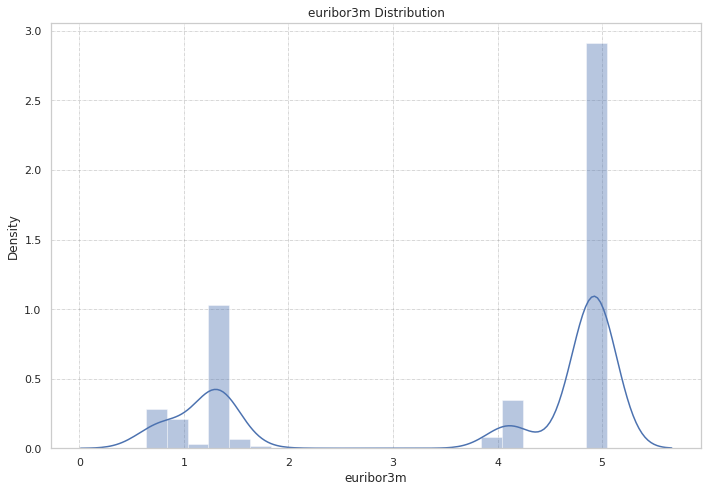

In [56]:
create_hist(data['euribor3m'], 'euribor3m')

In [ ]:
conversion_bar('euribor3m')

In [53]:
data['ir'] = pd.cut(data["euribor3m"], np.arange(0, 6, 1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  


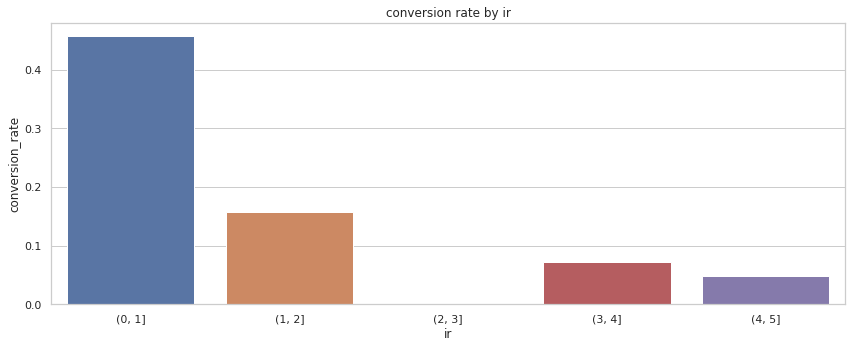

In [54]:
conversion_bar('ir')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


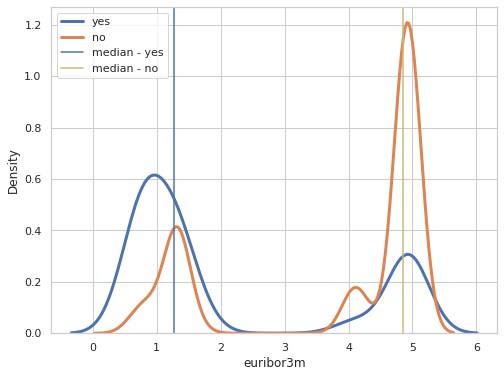

In [55]:
plt.figure(figsize=(8,6))
sns.distplot(df_y['euribor3m'], hist = False, kde = True, kde_kws = {'linewidth': 3},label = 'yes')
sns.distplot(df_n['euribor3m'], hist = False, kde = True, kde_kws = {'linewidth': 3},label = 'no')    

median_y = df_y['euribor3m'].median()
median_n = df_n['euribor3m'].median()

plt.axvline(x = median_y, color = 'b', label = 'median - yes')
plt.axvline(x = median_n, color = 'y', label = 'median - no')

plt.legend()

In [ ]:
conversion_bar('pdays')

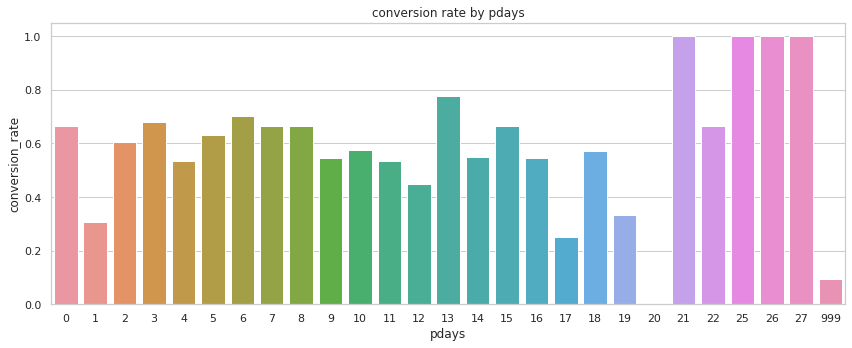

In [28]:
conversion_bar('')

In [62]:
data['weekly'] = pd.cut(data["pdays"], np.arange(0, 90, 7))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  


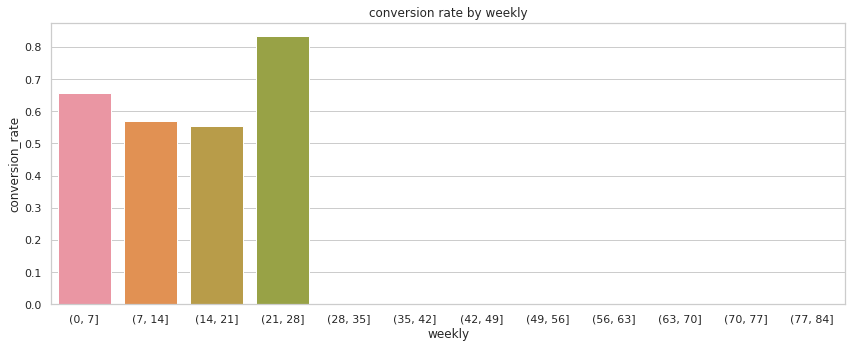

In [63]:
conversion_bar('weekly')

-people don't subscriber after 1 month following thg last contact
- conversion rate is higher when date get closer to 30 days

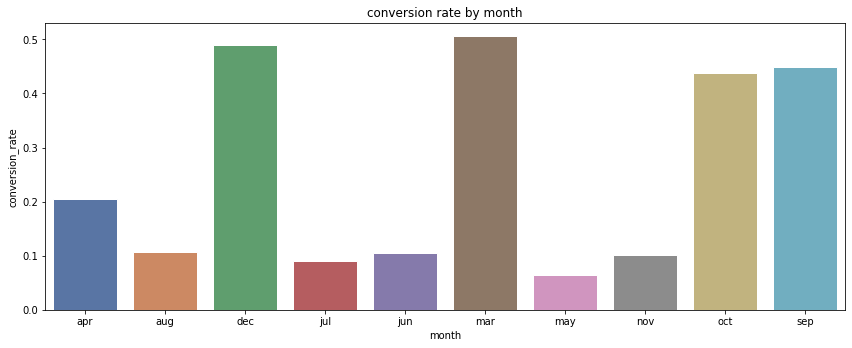

In [16]:
conversion_bar('month')

- holiday, people saves a lum sum of money,
- summer, people go vocation
- september, students start school
- there is no Jan, Feb data points

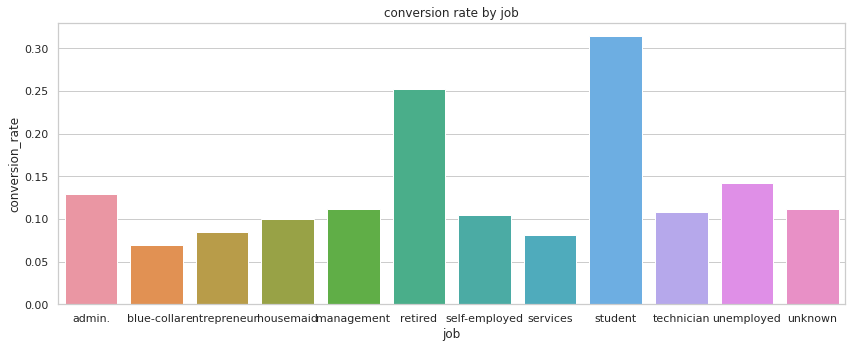

In [17]:
conversion_bar('job')

can we group by categories. 
retired & students & unemployed are categorized 'unemployed'????
all others into "employed"????

retired and students are perceived more risk averse than other occupations, so maybe that's why they prefer term deposit??? 

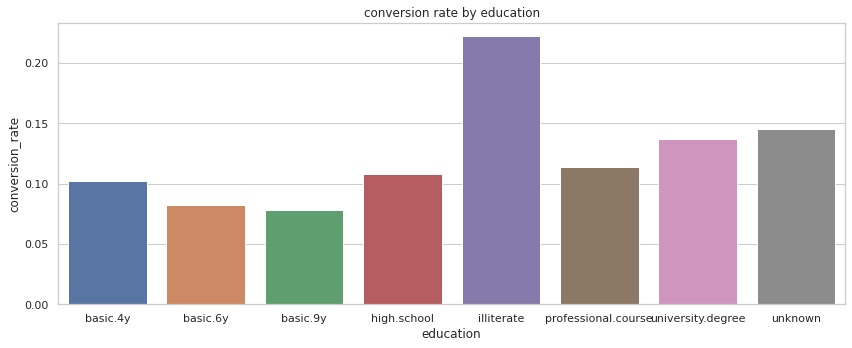

In [18]:
conversion_bar('education')

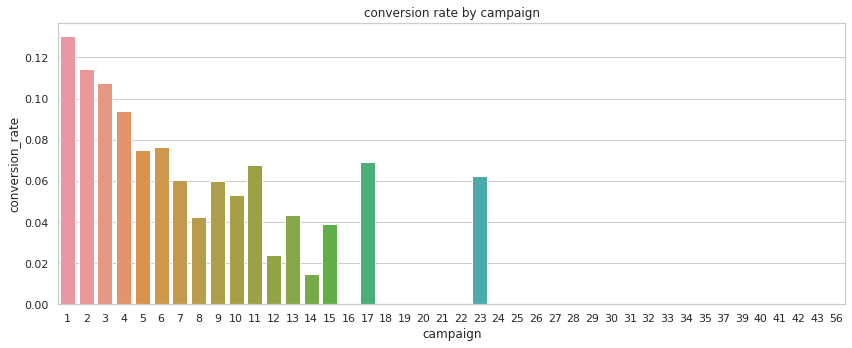

In [19]:
conversion_bar('campaign')

increasing contact frequency does not seem to improve the conversion rate

11 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

In [70]:
data.groupby('y')['campaign'].value_counts()

y    campaign
no   1           15342
     2            9359
     3            4767
     4            2402
     5            1479
     6             904
     7             591
     8             383
     9             266
     10            213
     11            165
     12            122
     13             88
     14             68
     17             54
     16             51
     15             49
     18             33
     20             30
     19             26
     21             24
     22             17
     23             15
     24             15
     27             11
     29             10
     25              8
     26              8
     28              8
     30              7
     31              7
     35              5
     32              4
     33              4
     34              3
     40              2
     42              2
     43              2
     37              1
     39              1
     41              1
     56              1
yes  1            23

**PCA Analysis**

In [20]:
cols = data.columns
num_cols = data._get_numeric_data().columns
cat_col = list(set(cols) - set(num_cols))
cat_col

['education',
 'day_of_week',
 'poutcome',
 'month',
 'loan',
 'job',
 'marital',
 'default',
 'contact',
 'y',
 'housing']

In [21]:
# One hot encoding - to convert categorical data to continuous
df_pca = data.copy()
df_pca[cat_col] = df_pca[cat_col].astype(str)
df3 = pd.get_dummies(df_pca)
df3.head(5)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0


In [22]:
# Standardizing
from sklearn.preprocessing import StandardScaler
num_col = data._get_numeric_data().columns
scaler = StandardScaler()
df3[num_col]=scaler.fit_transform(df3[num_col])
df3.head(5)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,0,1,0,0,0,0,1,0,1,0
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,0,1,0,0,0,0,1,0,1,0
2,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,0,1,0,0,0,0,1,0,1,0
3,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,0,1,0,0,0,0,1,0,1,0
4,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,0,1,0,0,0,0,1,0,1,0


In [57]:
data['campaign'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 19, 18, 23, 14,
       22, 25, 16, 17, 15, 20, 56, 39, 35, 42, 28, 26, 27, 32, 21, 24, 29,
       31, 30, 41, 37, 40, 33, 34, 43])

In [23]:
pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=7b9926eba72faf037f16da67465a91914fc34806999875eea3dff279acf89fc1
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [24]:
# PCA
from sklearn.decomposition import PCA
# Loop Function to identify number of principal components that explain at least 85% of the variance
for comp in range(3, df3.shape[1]):
    pca = PCA(n_components= comp, random_state=42)
    pca.fit(df3)
    comp_check = pca.explained_variance_ratio_
    final_comp = comp
    if comp_check.sum() > 0.85:
        break
        
Final_PCA = PCA(n_components= final_comp,random_state=42)
Final_PCA.fit(df3)
cluster_df=Final_PCA.transform(df3)
num_comps = comp_check.shape[0]
print("Using {} components, we can explain {}% of the variability in the original data.".format(final_comp,comp_check.sum()))

Using 17 components, we can explain 0.8598704892104234% of the variability in the original data.


In [25]:
train_features = df3.drop(['y_no', 'y_yes','binary' ], axis=1)

model = PCA(n_components=10).fit(train_features)
X_pc = model.transform(train_features)

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = train_features.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df_pca_fea = pd.DataFrame(dic.items())

In [26]:
df_pca_fea = df_pca_fea.rename(columns={0: 'PCA', 1: 'Feature'})
df_pca_fea

,PCA,Feature
0,PC0,euribor3m
1,PC1,pdays
2,PC2,age
3,PC3,duration
4,PC4,cons.conf.idx
5,PC5,campaign
6,PC6,contact_cellular
7,PC7,housing_yes
8,PC8,previous
9,PC9,job_blue-collar
